In [529]:
import keras
import tensorflow
import pandas as pd
import os
from csv import DictReader
import numpy as np
from math import floor

In [530]:
os.listdir(".")

['rainfall',
 'weekly_tabulated_data_deleted_normalized_2000_2019.csv',
 'temperature-rainfall-allocation',
 '.DS_Store',
 'weekly_tabulated_data_normalized_2000_2019.csv',
 'dengue-pre2012.csv',
 'populationregiondata.csv',
 'Untitled.ipynb',
 'weekly_tabulated_data_deleted.csv',
 'weekly_tabulated_data.csv',
 'weekly_tabulated_data_deleted_normalized_2010_2019.csv',
 'weekly_tabulated_data_normalized_2010_2019.csv',
 'dengue-post2012',
 'shuffling_renamer.py',
 'population-sg.csv',
 '.ipynb_checkpoints',
 'temperature',
 'daily_tabulated_data.csv']

In [531]:
# load daily csv file
daily_df = pd.read_csv("daily_tabulated_data.csv")
daily_df

,Year,Month,Day,dengue-incidence,_interpolatedadmiralty,_interpolatedang-mo-kio,_interpolatedboon-lay-east,_interpolatedchangi,_interpolatedchoa-chu-kang-south,_interpolatedclementi,...,pasir-panjang,pulau-ubin,seletar,semakau-island,sembawang,sentosa-island,tai-seng,tengah,tuas-south,total-population
0,2000,1,1,17,26.5,27.1,27.6,27.5,27.3,27.3,...,97790,0,62000,0,209990,0,445380,670,0,4027887
1,2000,1,2,17,26.2,26.8,27.3,27.5,27.1,27.1,...,97790,0,62000,0,209990,0,445380,670,0,4027887
2,2000,1,3,17,26.5,26.8,27.0,27.2,26.9,26.9,...,97790,0,62000,0,209990,0,445380,670,0,4027887
3,2000,1,4,17,27.0,27.2,26.7,27.8,26.7,26.7,...,97790,0,62000,0,209990,0,445380,670,0,4027887
4,2000,1,5,17,24.8,24.7,24.8,25.2,24.8,24.8,...,97790,0,62000,0,209990,0,445380,670,0,4027887
5,2000,1,6,17,24.9,24.8,24.8,25.1,24.8,24.8,...,97790,0,62000,0,209990,0,445380,670,0,4027887
6,2000,1,7,17,25.9,26.0,25.9,26.3,25.9,25.9,...,97790,0,62000,0,209990,0,445380,670,0,4027887
7,2000,1,8,10,27.5,27.6,27.4,27.6,27.4,27.4,...,97790,0,62000,0,209990,0,445380,670,0,4027887
8,2000,1,9,10,26.9,27.1,26.7,27.4,26.7,26.7,...,97790,0,62000,0,209990,0,445380,670,0,4027887
9,2000,1,10,10,25.1,25.2,24.7,25.2,24.7,24.7,...,97790,0,62000,0,209990,0,445380,670,0,4027887


In [532]:
# get column headers
col_names = []
for col in daily_df:
    col_names.append(col)

#label_header = col_names[3]
#print(label_header)
temperature_headers = col_names[4:24]
print(temperature_headers)
print(len(temperature_headers))
rainfall_headers = col_names[24:44]
print(rainfall_headers)
print(len(rainfall_headers))
pop_headers = col_names[44:64]
print(pop_headers)
print(len(pop_headers))

['_interpolatedadmiralty', '_interpolatedang-mo-kio', '_interpolatedboon-lay-east', '_interpolatedchangi', '_interpolatedchoa-chu-kang-south', '_interpolatedclementi', '_interpolatedeast-coast-parkway', '_interpolatedjurong-island', '_interpolatedkhatib', '_interpolatedmarina-barrage', '_interpolatednewton', '_interpolatedpasir-panjang', '_interpolatedpulau-ubin', '_interpolatedseletar', '_interpolatedsemakau-island', '_interpolatedsembawang', '_interpolatedsentosa-island', '_interpolatedtai-seng', '_interpolatedtengah', '_interpolatedtuas-south']
20
['_zeroed_admiralty', '_zeroed_ang-mo-kio', '_zeroed_boon-lay-east', '_zeroed_changi', '_zeroed_choa-chu-kang-south', '_zeroed_clementi', '_zeroed_east-coast-parkway', '_zeroed_jurong-island', '_zeroed_khatib', '_zeroed_marina-barrage', '_zeroed_newton', '_zeroed_pasir-panjang', '_zeroed_pulau-ubin', '_zeroed_seletar', '_zeroed_semakau-island', '_zeroed_sembawang', '_zeroed_sentosa-island', '_zeroed_tai-seng', '_zeroed_tengah', '_zeroed_tu

In [533]:
# load daily data into list of numpy
station_data = []

for station_idx in range(20):
    #station_data.append([])
    data = []
    data.append(daily_df[temperature_headers[station_idx]].tolist()[3654:None])
    data.append(daily_df[rainfall_headers[station_idx]].tolist()[3654:None])
    #data.append(daily_df["total-population"].tolist()[3654:None])
    #data.append(daily_df[pop_headers[station_idx]].tolist())
    data = np.array(data)
    station_data.append(data)
    #print(data.shape)
    
    
assert(len(station_data) == 20)
for station_idx in range(20):
    assert(station_data[0].shape[0]==2)
    #print(station_data[0].shape[1])
    assert(station_data[0].shape[1]==3612)
print("All daily sizes correct.")

All daily sizes correct.


In [534]:
# load weekly csv file
weekly_df = pd.read_csv("weekly_tabulated_data.csv")
weekly_df

,Week,dengue-incidence,_interpolatedadmiralty,_interpolatedang-mo-kio,_interpolatedboon-lay-east,_interpolatedchangi,_interpolatedchoa-chu-kang-south,_interpolatedclementi,_interpolatedeast-coast-parkway,_interpolatedjurong-island,...,pasir-panjang,pulau-ubin,seletar,semakau-island,sembawang,sentosa-island,tai-seng,tengah,tuas-south,total-population
0,1,17.0,26.0,26.2,26.3,26.7,26.2,26.2,26.7,26.3,...,97790.0,0.0,62000.0,0.0,209990.0,0.0,445380.0,670.0,0.0,4027887.0
1,2,10.0,26.0,26.2,25.8,26.4,25.8,25.8,26.4,25.8,...,97790.0,0.0,62000.0,0.0,209990.0,0.0,445380.0,670.0,0.0,4027887.0
2,3,15.0,26.0,26.2,25.6,26.5,25.6,25.6,26.5,25.6,...,97790.0,0.0,62000.0,0.0,209990.0,0.0,445380.0,670.0,0.0,4027887.0
3,4,15.0,26.0,26.2,25.5,26.2,25.5,25.5,26.2,25.5,...,97790.0,0.0,62000.0,0.0,209990.0,0.0,445380.0,670.0,0.0,4027887.0
4,5,13.0,25.6,25.9,25.3,25.9,25.3,25.3,25.9,25.3,...,97790.0,0.0,62000.0,0.0,209990.0,0.0,445380.0,670.0,0.0,4027887.0
5,6,19.0,26.3,26.4,26.1,26.6,26.1,26.1,26.6,26.1,...,97790.0,0.0,62000.0,0.0,209990.0,0.0,445380.0,670.0,0.0,4027887.0
6,7,5.0,26.8,26.9,26.7,27.2,26.7,26.7,27.2,26.7,...,97790.0,0.0,62000.0,0.0,209990.0,0.0,445380.0,670.0,0.0,4027887.0
7,8,16.0,25.7,25.7,25.6,25.9,25.6,25.6,25.9,25.6,...,97790.0,0.0,62000.0,0.0,209990.0,0.0,445380.0,670.0,0.0,4027887.0
8,9,14.0,27.3,27.2,27.1,27.3,27.1,27.1,27.3,27.1,...,97790.0,0.0,62000.0,0.0,209990.0,0.0,445380.0,670.0,0.0,4027887.0
9,10,11.0,28.4,28.2,28.3,28.0,28.3,28.3,28.0,28.3,...,97790.0,0.0,62000.0,0.0,209990.0,0.0,445380.0,670.0,0.0,4027887.0


In [535]:
# load groundtruth and weekly pop data
groundtruth_list = weekly_df["dengue-incidence"].tolist()[522:None]
groundtruth = np.array(groundtruth_list)
pop_list = weekly_df["total-population"].tolist()[522:None]
pop = np.array(pop_list)

print(groundtruth.shape[0])
print(pop.shape[0])
assert(groundtruth.shape[0] == 1038 - 522)
assert(pop.shape[0] == 1038 - 522)

516
516


In [536]:
def train_test_split(data, train_margin):
    """
    Parameters:
    data - numpy array of shape (N, num_feats)
    train_margin - ratio of datapoints allocated to train data

    Returns:
    train_data - numpy array of shape (floor(N * train margin), num_feats)
    test_data - numpy array of shape (N - floor(N * train margin), num_feats)
    
    Note:
    Exception handling not implemented
    """
    
    n = data.shape[0]
    print(n)
    num_training = floor(n * train_margin)
    return data[0:num_training,:], data[num_training:n,:]


def train_test_split_predetermined_weekly(weekly_data):
    """
    Parameters:
    weekly_data - numpy array of shape (M, num_feats)
    
    Conditions:
    M = 516
    
    train dataset size = 359 weeks
    test dataset = 157 weeks
    """
    weekly_data_train, weekly_data_test = weekly_data[0:359,:], weekly_data[359:None,:]
    print(weekly_data_train.shape)
    print(weekly_data_test.shape)
    return weekly_data_train, weekly_data_test

def train_test_split_predetermined_daily(daily_data):
    """
    Parameters:
    daily_data - numpy array of shape (N, num_feats)
    
    Conditions:
    N = 3612
    
    train dataset size = 2513 days
    test dataset = 1099 days
    """
    daily_data_train, daily_data_test = daily_data[0:2513,:], daily_data[2513:None,:]
    print(daily_data_train.shape)
    print(daily_data_test.shape)
    return daily_data_train, daily_data_test

In [537]:
# train_daily, test_daily = train_test_split(station_data[0].T, 0.8)
# train_weekly, test_weekly = train_test_split(np.expand_dims(pop,axis=1), 0.80045)
# print(station_data[0].T.shape)
# print(train_daily.shape)
# print(test_daily.shape)
# print("")

# print(np.expand_dims(pop,axis=1).shape)
# print(train_weekly.shape)
# print(test_weekly.shape)

# print(train_daily.shape[0] / train_weekly.shape[0])

weekly_data_train, weekly_data_test = train_test_split_predetermined_weekly(np.expand_dims(pop,axis=1))
groundtruth_train, groundtruth_test = train_test_split_predetermined_weekly(np.expand_dims(groundtruth,axis=1))

station_data_train = []
station_data_test = []

for i in range(len(station_data)):
    daily_train, daily_test = train_test_split_predetermined_daily(station_data[i].T)
    station_data_train.append(daily_train)
    station_data_test.append(daily_test)


(359, 1)
(157, 1)
(359, 1)
(157, 1)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)
(2513, 2)
(1099, 2)


In [538]:
def standardize_data(data):
    """Standardizes data across axis 0. Returns the mean and stddev of each column as well.
    Parameters:
    data - numpy array of shape (N, num_feats)
    
    Returns:
    std_data - data standardized across axis 0
    mean - mean of each column. array of shape (num_feats)
    stddev - standard deviation of each column. array of shape (num_feats)
    """
    
    mean = np.sum(data, axis=0) / data.shape[0]
    stddev = np.std(data, axis=0)
    std_data = (data - mean) / stddev
    return std_data, mean, stddev

def standardize_data_using_precomputed(data, mean, stddev):
    return (data - mean) / stddev

def undo_standardization(data, mean, stddev):
    return data * stddev + mean

In [539]:
# BLOCK RESERVED FOR STANDARDIZATION OF DATA

weekly_data_train, weekly_mean, weekly_std = standardize_data(weekly_data_train)
weekly_data_test = standardize_data_using_precomputed(weekly_data_test, weekly_mean, weekly_std)

#groundtruth_train, groundtruth_mean, groundtruth_std = standardize_data(groundtruth_train)
#groundtruth_test = standardize_data_using_precomputed(groundtruth_test, groundtruth_mean, groundtruth_std)

groundtruth_train = groundtruth_train / 400

groundtruth_test = groundtruth_test / 400

#print(undo_standardization(groundtruth_train, groundtruth_mean, groundtruth_std))

station_means = []
station_stds = []
for i in range(len(station_data)):
    station_data_train[i], _mean, _std = standardize_data(station_data_train[i])
    station_means.append(_mean)
    station_stds.append(_std)
    station_data_test[i] = standardize_data_using_precomputed(station_data_test[i], _mean, _std)
    
#print(station_data_train)

In [540]:
def window_the_data(time_series_data, window_size):
    """
    Parameters:
    time_series_data - numpy array of shape (N, num_feats)
    window_size - int representing window size
    
    Returns:
    numpy array of shape (N-window_size, window_size, num_feats). Each row represents one datapoint.
    
    NOTE: WE REDUCE BY ONE EXTRA DATAPOINT THAN IS NECESSARY TO PRESERVE MULTIPLICITY OF 7 IN DAILY DATA.
    """
    time_series_data = time_series_data.T
    num_feats = time_series_data.shape[0]
    col_dim = time_series_data.shape[1]
    resultant_n = col_dim - window_size +1
    datapoints = []
    for i in range(resultant_n):
        single_datapoint = []
        for feat in range(num_feats):
            single_datapoint.append(time_series_data[feat, i:i+window_size])
        #print(len(single_datapoint))
        datapoints.append(single_datapoint)
    return np.transpose(np.array(datapoints), axes=(0,2,1))[1:None]

def process_data_subset(station_data, weekly_data, groundtruth, weekly_window, prediction_lead=8):
    """Windows the data, then crops the groundtruth to match the training or test dataset after windowing. 
    Then crops all data to process for prediction_lead time.
    
    eg. For T+8, first 7 groundtruths are deleted, and last 7 weekly entries of data deleted.
    for daily data, last 49 entries are deleted.
    """
    windowed_station_data = []
    for i in range(len(station_data_train)):
        windowed_station_data.append(window_the_data(station_data[i], weekly_window*7)[:-((prediction_lead-1)*7)])
        
    windowed_weekly_data = window_the_data(weekly_data, weekly_window)[:-(prediction_lead-1)]
    windowed_groundtruth = groundtruth[weekly_window:-(prediction_lead-1)]
    
    return windowed_station_data, windowed_weekly_data, windowed_groundtruth


def convert_all_station_daily_to_weekly_series(station_data):
    """Groups all station data by week
    
    Input: List of station data. Each element in the list should be a numpy array of shape (N_daily, num_feats)
    Returns: List of converted station data. Each element is numpy array of shape (N//7, 7, num_feats)
    """
    
    weekly_station_data = []
    
    for i in range(len(station_data)):
        new_data = []
        num_feats = station_data[i].shape[1]
        
        #print(station_data[i].shape[0]//7)
        #print(num_feats)
        new_weekly_data = []
        for j in range(station_data[i].shape[0]//7):
            new_data = []
            for k in range(num_feats):
                new_data.append(station_data[i][j*7:j*7+7,k])
                #print(np.array(new_data).shape)
                
            #print("appending")
            new_weekly_data.append(new_data)
            
        #print(len(new_weekly_data))
        weekly_station_data.append(np.transpose(np.array(new_weekly_data), axes=(0,2,1)))
        
    return weekly_station_data

def window_converted_daily_station_data(station_data, weekly_window):
    windowed_station_data = []
    
    for i in range(len(station_data)):
        num_feats = station_data[i].shape[2]
        num_points = station_data[i].shape[0]
        resultant_N = num_points - weekly_window + 1
        
        datapoints = []
        for j in range(resultant_N):
            single_datapoint = []
            for feat in range(num_feats):
                single_datapoint.append(list(station_data[i][j,:,feat]))
                for k in range(1, weekly_window):
                    single_datapoint[feat].extend(station_data[i][j+k,:,feat])
            datapoints.append(single_datapoint)
        windowed_station_data.append(np.transpose(np.array(datapoints)[1:None], axes=(0,2,1)))
    return windowed_station_data
    

In [541]:
# Groups all daily data into groups of 7 to match weekly batch dimensionality.
# Thereafter, apply windowing to the resultant data.
# Difference between grouping and windowing is that there are no overlaps in grouping, while windowing has overlaps


# window the daily data
WEEKLY_WINDOW = 26
#DAILY_WINDOW = 7 * WEEKLY_WINDOW

converted_station_data_train = convert_all_station_daily_to_weekly_series(station_data_train)
print("Converted Train:", converted_station_data_train[0].shape)
#print(list(converted_station_data_train[0][0,:,1]))

windowed_conv_station_data_train = window_converted_daily_station_data(converted_station_data_train, WEEKLY_WINDOW)
print("Windowed Train:", windowed_conv_station_data_train[0].shape)

converted_station_data_test = convert_all_station_daily_to_weekly_series(station_data_test)
print("Converted Test:", converted_station_data_test[0].shape)
#print(list(converted_station_data_test[0][0,:,1]))

windowed_conv_station_data_test = window_converted_daily_station_data(converted_station_data_test, WEEKLY_WINDOW)
print("Windowed Test:", windowed_conv_station_data_test[0].shape)

Converted Train: (359, 7, 2)
Windowed Train: (333, 182, 2)
Converted Test: (157, 7, 2)
Windowed Test: (131, 182, 2)


In [542]:
# Now, window the population data and process labels

windowed_weekly_data_train = window_the_data(weekly_data_train, WEEKLY_WINDOW)
print("Windowed population data train:", windowed_weekly_data_train.shape)

windowed_weekly_data_test = window_the_data(weekly_data_test, WEEKLY_WINDOW)
print("Windowed population data test:", windowed_weekly_data_test.shape)

windowed_groundtruth_train = groundtruth_train[WEEKLY_WINDOW:None] 
windowed_groundtruth_test = groundtruth_test[WEEKLY_WINDOW:None] 
print("Windowed groundtruth train:", windowed_groundtruth_train.shape)
print("Windowed groundtruth train:", windowed_groundtruth_test.shape)

Windowed population data train: (333, 26, 1)
Windowed population data test: (131, 26, 1)
Windowed groundtruth train: (333, 1)
Windowed groundtruth train: (131, 1)


In [543]:
# Finally, offset by prediction lead time. 
# This entails deleting the first (PREDICTION - 1) points of training data,
# and deleting the last (PREDICTION - 1) of groundtruth labels

PREDICTION_LEAD = 8 # weeks

final_station_train = []
final_station_test = []

for i in range(len(windowed_conv_station_data_train)):
    final_station_train.append(windowed_conv_station_data_train[i][0:-(PREDICTION_LEAD-1)])
    final_station_test.append(windowed_conv_station_data_test[i][0:-(PREDICTION_LEAD-1)])

print("Final station train (Single):", final_station_train[0].shape)
print("Final station test (Single):", final_station_test[0].shape)

final_pop_train = windowed_weekly_data_train[0:-(PREDICTION_LEAD-1)]
final_pop_test = windowed_weekly_data_test[0:-(PREDICTION_LEAD-1)]

print("Final population train:", final_pop_train.shape)
print("Final population test:", final_pop_test.shape)

final_groundtruth_train = windowed_groundtruth_train[(PREDICTION_LEAD - 1):None]
final_groundtruth_test = windowed_groundtruth_test[(PREDICTION_LEAD - 1):None]

print("Final groundtruth train:", final_groundtruth_train.shape)
print("Final groundtruth test:", final_groundtruth_test.shape)

Final station train (Single): (326, 182, 2)
Final station test (Single): (124, 182, 2)
Final population train: (326, 26, 1)
Final population test: (124, 26, 1)
Final groundtruth train: (326, 1)
Final groundtruth test: (124, 1)


In [544]:
# # window the daily data
# WEEKLY_WINDOW = 52
# DAILY_WINDOW = 7 * WEEKLY_WINDOW


# windowed_station_data_train, windowed_weekly_data_train, windowed_groundtruth_train = process_data_subset(station_data_train, 
#                                                                                                           weekly_data_train, 
#                                                                                                           groundtruth_train,
#                                                                                                           WEEKLY_WINDOW)
# print(len(windowed_station_data_train))
# print(windowed_station_data_train[0].shape)
# print(windowed_weekly_data_train.shape)
# print(windowed_groundtruth_train.shape)
# print("")

# windowed_station_data_test, windowed_weekly_data_test, windowed_groundtruth_test = process_data_subset(station_data_test, 
#                                                                                                           weekly_data_test, 
#                                                                                                           groundtruth_test,
#                                                                                                           WEEKLY_WINDOW)

# print(len(windowed_station_data_test))
# print(windowed_station_data_test[0].shape)
# print(windowed_weekly_data_test.shape)
# print(windowed_groundtruth_test.shape)
# print("")

In [545]:
# # window the daily data
# WEEKLY_WINDOW = 52
# DAILY_WINDOW = 7 * WEEKLY_WINDOW

# windowed_station_data_train = []
# windowed_station_data_test = []

# for i in range(len(station_data_train)):
#     windowed_station_data_train.append(window_the_data(station_data_train[i], DAILY_WINDOW))
#     windowed_station_data_test.append(window_the_data(station_data_test[i], DAILY_WINDOW))
# print(windowed_station_data_train[0].shape)
# print(windowed_station_data_test[0].shape)


# windowed_weekly_data_train = window_the_data(weekly_data_train, WEEKLY_WINDOW)
# windowed_weekly_data_test = window_the_data(weekly_data_test, WEEKLY_WINDOW)

# print(windowed_weekly_data_train.shape)
# print(windowed_weekly_data_test.shape)


In [546]:
def create_station_daily_networks(station_daily_data):
    station_network_submodels = []
    station_network_submodels_inputs = []
    station_network_submodels_outputs = []
    
    window_size = station_daily_data[0].shape[1]
    #print(window_size)
    num_feats = station_daily_data[0].shape[2]
    
    for i in range(len(station_daily_data)):
        inputs = keras.layers.Input(shape=(window_size, num_feats))
        layer = keras.layers.Conv1D(filters=4, kernel_size=28, padding='same', activation='relu')(inputs)
        layer = keras.layers.Conv1D(filters=4, kernel_size=14, padding='same', activation='relu')(layer)
        layer = keras.layers.Conv1D(filters=8, kernel_size=7, padding='same', activation='relu')(layer)
        layer = keras.layers.Conv1D(filters=16, kernel_size=7, strides=7, padding='valid', activation='relu')(layer)
        #layer = keras.layers.Conv1D(filters=8, kernel_size=7, strides=7, padding='valid', activation='relu')(inputs)
        
        station_network_submodels.append(keras.models.Model(inputs=inputs, outputs=layer))
        station_network_submodels_inputs.append(station_network_submodels[i].input)
        station_network_submodels_outputs.append(station_network_submodels[i].output)
        
    return station_network_submodels, station_network_submodels_inputs, station_network_submodels_outputs

In [547]:
station_submods, submods_inputs, submods_outputs = create_station_daily_networks(final_station_train)

print(station_submods[0].summary())

aggregated_outputs = keras.layers.concatenate(submods_outputs)

print(aggregated_outputs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_549 (InputLayer)       (None, 182, 2)            0         
_________________________________________________________________
conv1d_1725 (Conv1D)         (None, 182, 4)            228       
_________________________________________________________________
conv1d_1726 (Conv1D)         (None, 182, 4)            228       
_________________________________________________________________
conv1d_1727 (Conv1D)         (None, 182, 8)            232       
_________________________________________________________________
conv1d_1728 (Conv1D)         (None, 26, 16)            912       
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
None
Tensor("concatenate_45/concat:0", shape=(?, 26, 320), dtype=float32)


In [548]:
pop_inputs = keras.layers.Input(shape=(final_pop_train.shape[1], final_pop_train.shape[2]))
print(pop_inputs)

combined_with_population = keras.layers.concatenate([aggregated_outputs, pop_inputs])
print(combined_with_population)

Tensor("input_569:0", shape=(?, 26, 1), dtype=float32)
Tensor("concatenate_46/concat:0", shape=(?, 26, 321), dtype=float32)


In [549]:
final_inputs = submods_inputs
final_inputs.append(pop_inputs)
print(len(final_inputs))

21


In [550]:
end_layer = keras.layers.Conv1D(filters=8, kernel_size=28, padding='same', activation='relu')(combined_with_population)
#end_layer = keras.layers.MaxPooling1D(pool_size=2)(end_layer)

end_layer = keras.layers.Conv1D(filters=16, kernel_size=14, padding='same', activation='relu')(end_layer)
end_layer = keras.layers.Conv1D(filters=16, kernel_size=14, padding='same', activation='relu')(end_layer)
end_layer = keras.layers.MaxPooling1D(pool_size=2)(end_layer)

end_layer = keras.layers.Conv1D(filters=32, kernel_size=7, padding='same', activation='relu')(end_layer)
# end_layer = keras.layers.MaxPooling1D(pool_size=2)(end_layer)

end_layer = keras.layers.Flatten()(end_layer)
end_layer = keras.layers.Dense(128, activation="relu", activity_regularizer=keras.regularizers.l1(0.001))(end_layer)
end_layer = keras.layers.Dense(64, activation="relu",  activity_regularizer=keras.regularizers.l1(0.001))(end_layer)
end_layer = keras.layers.Dense(32, activation="relu",  activity_regularizer=keras.regularizers.l1(0.001))(end_layer)
end_layer = keras.layers.Dense(1, activation="linear",  activity_regularizer=keras.regularizers.l1(0.001))(end_layer)

final_model = keras.models.Model(inputs=final_inputs, outputs=end_layer)
print(final_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_549 (InputLayer)          (None, 182, 2)       0                                            
__________________________________________________________________________________________________
input_550 (InputLayer)          (None, 182, 2)       0                                            
__________________________________________________________________________________________________
input_551 (InputLayer)          (None, 182, 2)       0                                            
__________________________________________________________________________________________________
input_552 (InputLayer)          (None, 182, 2)       0                                            
__________________________________________________________________________________________________
input_553 

In [551]:
#opt = keras.optimizers.Adam(lr=1e-3, decay=1e-3 / 200)
opt = keras.optimizers.SGD(lr=0.0001, nesterov=True)
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
#earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
#ck_save = keras.callbacks.ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

final_model.compile(optimizer=sgd
                    ,loss='mean_squared_error')
                    #,callbacks=[earlyStopping])

In [552]:
final_input_to_train_model = final_station_train
final_input_to_train_model.append(final_pop_train)

print(len(final_input_to_train_model), type(final_input_to_train_model))

final_input_to_val_model = final_station_test
final_input_to_val_model.append(final_pop_test)

print(len(final_input_to_val_model), type(final_input_to_val_model))

21 <class 'list'>
21 <class 'list'>


In [553]:
history = final_model.fit(final_input_to_train_model,
                                  final_groundtruth_train,
                                  validation_data=(final_input_to_val_model, final_groundtruth_test),
                                  batch_size=50,
                                  epochs=120)

Train on 326 samples, validate on 124 samples
Epoch 1/120
326/326 [==============================] - 14s 44ms/step - loss: 0.6719 - val_loss: 0.4372
Epoch 2/120
326/326 [==============================] - 1s 4ms/step - loss: 0.6673 - val_loss: 0.4317
Epoch 3/120
326/326 [==============================] - 1s 4ms/step - loss: 0.6606 - val_loss: 0.4255
Epoch 4/120
326/326 [==============================] - 1s 4ms/step - loss: 0.6535 - val_loss: 0.4191
Epoch 5/120
326/326 [==============================] - 1s 4ms/step - loss: 0.6457 - val_loss: 0.4127
Epoch 6/120
326/326 [==============================] - 1s 4ms/step - loss: 0.6383 - val_loss: 0.4067
Epoch 7/120
326/326 [==============================] - 1s 4ms/step - loss: 0.6318 - val_loss: 0.4010
Epoch 8/120
326/326 [==============================] - 1s 4ms/step - loss: 0.6249 - val_loss: 0.3957
Epoch 9/120
326/326 [==============================] - 1s 4ms/step - loss: 0.6188 - val_loss: 0.3906
Epoch 10/120
326/326 [=====================

Epoch 81/120
326/326 [==============================] - 2s 5ms/step - loss: 0.4485 - val_loss: 0.2673
Epoch 82/120
326/326 [==============================] - 2s 5ms/step - loss: 0.4473 - val_loss: 0.2665
Epoch 83/120
326/326 [==============================] - 2s 5ms/step - loss: 0.4460 - val_loss: 0.2657
Epoch 84/120
326/326 [==============================] - 1s 4ms/step - loss: 0.4447 - val_loss: 0.2649
Epoch 85/120
326/326 [==============================] - 1s 5ms/step - loss: 0.4434 - val_loss: 0.2641
Epoch 86/120
326/326 [==============================] - 1s 5ms/step - loss: 0.4421 - val_loss: 0.2633
Epoch 87/120
326/326 [==============================] - 1s 5ms/step - loss: 0.4409 - val_loss: 0.2625
Epoch 88/120
326/326 [==============================] - 2s 6ms/step - loss: 0.4397 - val_loss: 0.2618
Epoch 89/120
326/326 [==============================] - 2s 5ms/step - loss: 0.4384 - val_loss: 0.2610
Epoch 90/120
326/326 [==============================] - 2s 5ms/step - loss: 0.4372

[[58.592995]
 [58.573246]
 [58.744576]
 [59.08648 ]
 [58.944233]
 [59.35954 ]
 [59.617817]
 [58.43522 ]
 [58.526386]
 [58.30591 ]
 [59.625523]
 [59.36818 ]
 [58.442223]
 [58.1056  ]
 [59.388958]
 [58.945023]
 [58.815224]
 [59.22438 ]
 [59.134842]
 [58.483643]
 [58.724243]
 [59.420578]
 [59.108704]
 [59.77937 ]
 [59.39163 ]
 [59.668755]
 [59.060608]
 [60.132664]
 [59.694202]
 [59.99243 ]
 [59.21798 ]
 [59.46529 ]
 [59.175934]
 [59.380817]
 [61.45918 ]
 [61.24003 ]
 [59.86716 ]
 [60.292072]
 [59.920925]
 [59.610462]
 [60.11393 ]
 [59.59748 ]
 [59.530884]
 [58.774887]
 [59.23937 ]
 [58.747845]
 [58.837765]
 [59.309723]
 [59.173244]
 [58.02489 ]
 [60.22229 ]
 [59.966034]
 [59.25956 ]
 [59.782803]
 [60.17311 ]
 [62.047516]
 [62.175655]
 [59.602737]
 [57.709347]
 [58.37611 ]
 [59.41018 ]
 [59.491642]
 [59.23055 ]
 [59.54299 ]
 [60.259354]
 [60.557365]
 [59.77264 ]
 [58.655212]
 [58.908142]
 [58.89641 ]
 [58.553635]
 [58.552532]
 [58.82048 ]
 [59.91198 ]
 [58.890976]
 [59.761154]
 [59.571777]

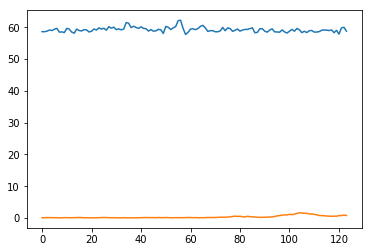

In [554]:
import matplotlib.pyplot as plt
predicted = final_model.predict(final_input_to_val_model)
#predicted_unstandardize = undo_standardization(predicted, groundtruth_mean, groundtruth_std)
predicted_unstandardize = predicted * 400
print(predicted_unstandardize)

x_axis = range(len(predicted_unstandardize))

plt.plot(x_axis, predicted_unstandardize)
plt.plot(x_axis, final_groundtruth_test)
plt.show()